# Project 2

## Exercise 1: Web Scraping + Coding Best Practices

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
def scrape_alumni_data(grad_year):
    # save the response text as a soup object
    url = f"https://www.mccormick.northwestern.edu/machine-learning-data-science/people/alumni/class-of-{grad_year}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    
    alumni_data = []
    
    # find text for each student
    for i in soup.find_all(class_="faculty cf"):
        #find name, job titles, and company names
        pattern = r"(.+?)MSiA Class of (20\d{2})(.*?)(?:\s+at\s*(.*?))?$"
        matches = re.findall(pattern, i.text)
        
        # extract data
        for match in matches:
            name = match[0].strip()
            job_title = match[2].strip() if match[2] else "N/A"
            company_name = match[3].strip() if match[3] else "N/A"
            alumni_data.append([name, grad_year, job_title, company_name])
    
    return alumni_data

In [3]:
# concat data in all years
alumni_data = []
for year in range(2013, 2023):
    alumni_data += scrape_alumni_data(year)

# make a dataframe
columns = ['Name', 'Graduation Year', 'Current role', 'Current Company']
df = pd.DataFrame(alumni_data, columns=columns)

In [4]:
# manually edit some column
df['Current Company'] = df['Current Company'].replace('W. W. Grainger','Grainger')
df['Current Company'] = df['Current Company'].replace('Aetna, a CVS Health Company','Aetna')
df['Current Company'] = df['Current Company'].replace('Deloitte Consulting','Deloitte')
df['Current Company'] = df['Current Company'].replace('Blue Cross and Blue Shield of Illinois, Montana, New Mexico, Oklahoma & Texas','Blue Cross Blue Shield')
df['Current Company'] = df['Current Company'].replace('Blue Cross Blue Shield of Illinois, Montana, New Mexico, Oklahoma & Texas','Blue Cross Blue Shield')
df['Current Company'] = df['Current Company'].replace('Blue Cross Blue Shield\xa0of Illinois, Montana, New Mexico, Oklahoma & Texas','Blue Cross Blue Shield')
df['Current Company'] = df['Current Company'].replace('BCBS of Illinois, Monstana, New Mexico, Oklahoma & Texas','Blue Cross Blue Shield')
df['Current Company'] = df['Current Company'].replace('LinkedIn China','LinkedIn')
df.loc[10,"Current role"] = 'Assitant Professor and Research Assistant'
df.loc[10,"Current Company"] = 'Northwestern University and Emory University'
df.loc[32,"Current role"] = 'Computational Research Scientist - ML in Heatlh and BE'
df.loc[32,"Current Company"] = 'J Clinic and Massachusetts Institute of Technology'
df.loc[72,"Current role"] = 'Founding Partner and Solution Leader'
df.loc[72,"Current Company"] = 'Aventrix and C3.ai'
df.loc[189,"Current Company"] = 'ABC Supply'
df.loc[228,"Current Company"] ='Coupa Software'
df

,Name,Graduation Year,Current role,Current Company
0,Scott Albrecht,2013,"Senior Manager, Data Science",Grainger
1,Yoojong Bang,2013,Principal Data Scientist,Intent Media Inc.
2,Shawna Baskin,2013,Senior Manager - Tabletop Analytics,Wizards of the Coast
3,William Chiu,2013,"Vice President, Head of Statistical Modeling",First Republic Bank
4,David Cooperberg,2013,Senior Product Manager,Alteryx
...,...,...,...,...
382,Qingyang (Jojo) Zhou,2022,N/A,N/A
383,Shenglang (Dylan) Zhou,2022,Machine Learning Engineer,Pinterest
384,Yihan Zhou,2022,Applied AI/ML Senior Associate,J.P. Morgan Chase
385,Shuli (Sheryl) Zhu,2022,N/A,N/A


#### Find the top 5 companies alumni are working at

In [5]:
# top 5 companies alumni are working at
top_companies = df[df["Current Company"]!="N/A"]['Current Company'].value_counts().head(5)
print("Top 5 companies alumni are working at:")
print(top_companies)

Top 5 companies alumni are working at:
Current Company
TransUnion        15
Facebook          13
Meta              13
Amazon            11
Coupa Software     9
Name: count, dtype: int64


#### Two other interesting insights
a. number of graduation each year

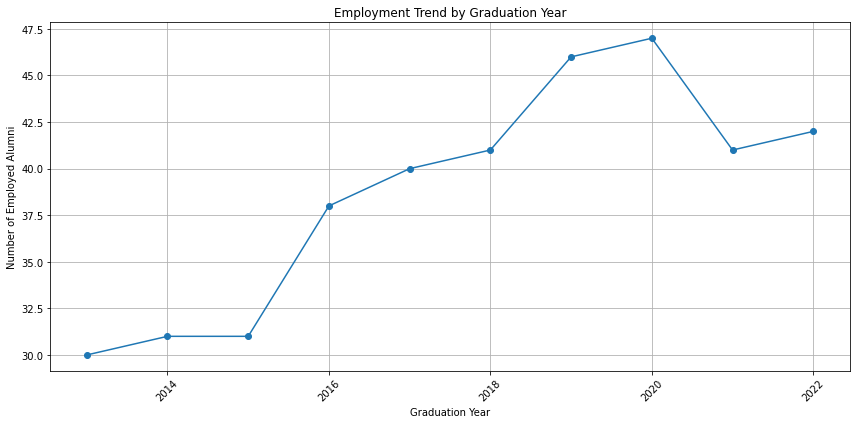

In [15]:
graduation_counts = df['Graduation Year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
graduation_counts.plot(kind='line', marker='o')
plt.title('Employment Trend by Graduation Year')
plt.xlabel('Graduation Year')
plt.ylabel('Number of Employed Alumni')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

We can see that the number of graduating students started at approximately 30, increased to around 40, and reached its peak in 2020 with 47 graduating students.

b. the most common job roles among alumni

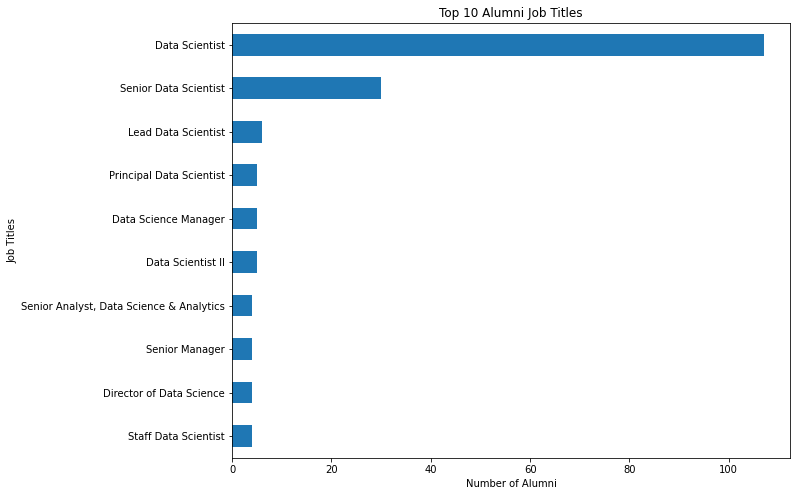

In [14]:
# find the 10 most common roles
top_roles = df[df['Current role']!="N/A"]['Current role'].value_counts().head(10)

# plot
plt.figure(figsize=(10, 8))
top_roles.plot(kind='barh')
plt.title('Top 10 Alumni Job Titles')
plt.xlabel('Number of Alumni')
plt.ylabel('Job Titles')
plt.gca().invert_yaxis()  
plt.show()

We can find that most alumnis are working under the title of Data Scientist.

## Exercise 2: API

In [8]:
# Replace with your World Weather API key
api_key = "fbfce31ac62940648e234245230511"

# 20 distinct locations
locations = [
    "London,UK",
    "New York,USA",
    "Paris,France",
    "Tokyo,Japan",
    "Sydney,Australia",
    "Los Angeles,USA",
    "Berlin,Germany",
    "Rome,Italy",
    "Moscow,Russia",
    "Beijing,China",
    "Toronto,Canada",
    "Madrid,Spain",
    "Dubai,UAE",
    "Singapore,Singapore",
    "Sao Paulo,Brazil",
    "Cape Town,South Africa",
    "New Delhi,India",
    "Stockholm,Sweden",
    "Vienna,Austria",
    "Cairo,Egypt"
]

# Set the date range for the historical weather data (e.g., one month)
start_date = "2023-10-01"
end_date = "2023-10-31"

# Initialize empty dictionaries to store temperature data
min_temperatures = {}
mean_temperatures = {}
max_temperatures = {}

# Fetch weather data for each location
for location in locations:
    url = f"https://api.worldweatheronline.com/premium/v1/past-weather.ashx?key={api_key}&q={location}&date={start_date}&enddate={end_date}&format=json"
    response = requests.get(url)
    data = response.json()

    # Extract temperature data for each day
    temperatures = [float(day["avgtempC"]) for day in data["data"]["weather"]]
    min_temperatures[location] = min(temperatures)
    mean_temperatures[location] = sum(temperatures) / len(temperatures)
    max_temperatures[location] = max(temperatures)


In [9]:
# Create a summary table
weather_summary = pd.DataFrame({
    "Location": locations,
    "Min Temperature (°C)": [min_temperatures[loc] for loc in locations],
    "Mean Temperature (°C)": [mean_temperatures[loc] for loc in locations],
    "Max Temperature (°C)": [max_temperatures[loc] for loc in locations]
})
weather_summary

,Location,Min Temperature (°C),Mean Temperature (°C),Max Temperature (°C)
0,"London,UK",8.0,14.032258,19.0
1,"New York,USA",8.0,15.387097,21.0
2,"Paris,France",10.0,16.000000,23.0
3,"Tokyo,Japan",16.0,20.096774,27.0
4,"Sydney,Australia",14.0,18.193548,24.0
5,"Los Angeles,USA",18.0,21.709677,27.0
6,"Berlin,Germany",7.0,12.677419,20.0
7,"Rome,Italy",19.0,21.225806,23.0
8,"Moscow,Russia",-1.0,5.612903,15.0
9,"Beijing,China",14.0,17.838710,21.0


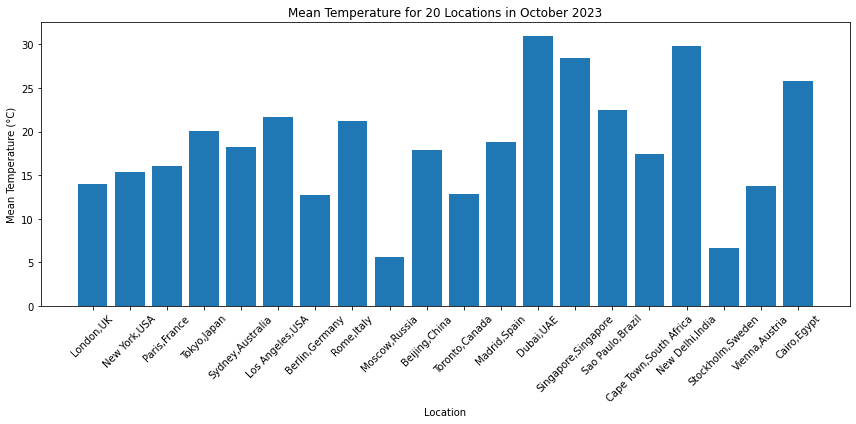

In [10]:
# Plot the mean temperature with bar chart
plt.figure(figsize=(12, 6))
plt.bar(weather_summary["Location"], weather_summary["Mean Temperature (°C)"])
plt.title("Mean Temperature for 20 Locations in October 2023")
plt.xlabel("Location")
plt.ylabel("Mean Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\xinra\AppData\Local\Temp\ipykernel_34760\4191315103.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


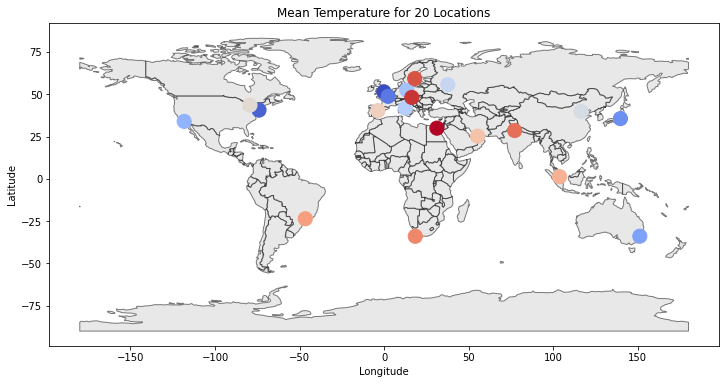

In [11]:
# Plot the mean temperature in the world map
# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define 20 locations with their names, latitude, longitude, and mean temperature
city_coordinates = {
    "London,UK": (51.5074, -0.1278),
    "New York,USA": (40.7128, -74.0060),
    "Paris,France": (48.8566, 2.3522),
    "Tokyo,Japan": (35.6828, 139.7595),
    "Sydney,Australia": (-33.8651, 151.2094),
    "Los Angeles,USA": (34.0522, -118.2437),
    "Berlin,Germany": (52.5200, 13.4050),
    "Rome,Italy": (41.9028, 12.4964),
    "Moscow,Russia": (55.7558, 37.6176),
    "Beijing,China": (39.9042, 116.4074),
    "Toronto,Canada": (43.6511, -79.3470),
    "Madrid,Spain": (40.4168, -3.7038),
    "Dubai,UAE": (25.2770, 55.2962),
    "Singapore,Singapore": (1.3521, 103.8198),
    "Sao Paulo,Brazil": (-23.5505, -46.6333),
    "Cape Town,South Africa": (-33.9249, 18.4241),
    "New Delhi,India": (28.6139, 77.2090),
    "Stockholm,Sweden": (59.3293, 18.0686),
    "Vienna,Austria": (48.2082, 16.3738),
    "Cairo,Egypt": (30.0444, 31.2357),
}

# Add latitude and longitude to the dataset
weather_summary["Latitude"] = [city_coordinates[loc][0] for loc in weather_summary["Location"]]
weather_summary["Longitude"] = [city_coordinates[loc][1] for loc in weather_summary["Location"]]


# Convert the locations data into a GeoDataFrame
gdf_locations = gpd.GeoDataFrame(
    weather_summary, 
    geometry=gpd.points_from_xy(weather_summary["Longitude"], weather_summary["Latitude"])
)

# Create the base map with transparency
ax = world.plot(figsize=(12, 6), color='lightgray', edgecolor='k', alpha=0.5)

# Plot the locations with larger points
gdf_locations.plot(ax=ax, cmap='coolwarm', markersize=200, legend=True)

# Add a title and labels
plt.title("Mean Temperature for 20 Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

The mean temperatures show a significant variation among the locations. Moscow, Russia, has a mean temperature of only 5.61°C, while Dubai, UAE, has a considerably higher mean temperature of 30.97°C. This demonstrates the contrast between colder and hotter regions.

Cities like London, UK, New York, USA, and Paris, France, have relatively moderate climates with mean temperatures ranging from 14°C to 16°C. Dubai, UAE, stands out as one of the hottest and driest locations in the dataset with a high mean temperature of 30.97°C. Moscow, Russia, and Stockholm, Sweden, experience colder temperatures with mean values below 7°C. 